(multivariate_lognormal_effect_sizes_vignette)=

# The multivariate lognormal distribution

In [1]:
import demes
import demesdraw
import fwdpy11
import numpy as np

If {math}`X` is a multivariate Gaussian distribution, {math}`N(\mathbf{\mu}, \mathbf{\sum})`, where {math}`\mathbf{\mu}` is a vector of mean values and
{math}`\mathbf{\sum}` is the covariance matrix, then {math}`Y = e^X` is a
multivariate lognormal random variable with mean {math}`E[Y]_i = e^{\mu_i + \frac{1}{2}\sum_{ii}}` and covariance matrix {math}`Var[Y]_{i,j} = e^{\mu_i + \mu_j + \frac{1}{2}(\sum_{ii} + \sum_{jj})}(e^{\sum_{ij}}-1)`.

To specify a multivariate lognormal distribution of effect sizes, we use
the static class method {func}`fwdpy11.LogNormalS.mv`.  The following code
constructs a distribution of effect sizes such that `-2Ns` (where `N` is the
size of a single deme) is a multivariate lognormal with means zero and an
identity matrix as a covariance matrix used to specify the multivariate
Gaussian kernel.

In [2]:
mvdes = fwdpy11.mvDES(
    fwdpy11.LogNormalS.mv(0, 1, 1, scaling=-200), np.zeros(2), np.identity(2)
)

:::{note}

The lognormal distribution returns deviates {math}`> 0`.
To model deleterious mutations/effect sizes < 0, use the
`scaling` parameter with a negative value like we just did!

:::

Let's put it in a simulation and run it.
We will simulate a demographic model of migration happening into the infinite past of two equal-sized demes:

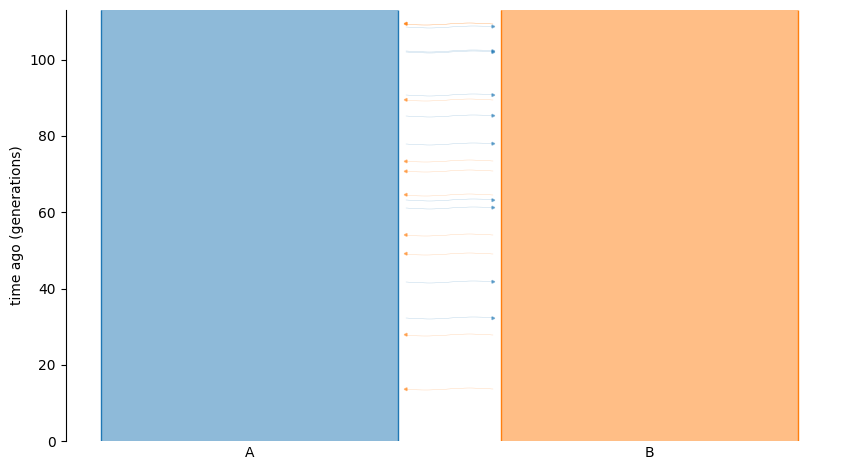

In [3]:
yaml = """
description: Island model forever
time_units: generations
demes:
  - name: A
    epochs:
     - start_size: 100
  - name: B
    epochs:
     - start_size: 100
migrations:
  - demes: [A, B]
    rate: 0.10
"""
g = demes.loads(yaml)
model = fwdpy11.discrete_demography.from_demes(g, burnin=1)
demesdraw.tubes(g);

In [4]:
pdict = {
    "nregions": [],
    "recregions": [],
    "sregions": [mvdes],
    "rates": (0, 5e-3, None),
    "demography": model,
    "simlen": model.metadata["total_simulation_length"],
    "gvalue": fwdpy11.Multiplicative(ndemes=2, scaling=2),
}
params = fwdpy11.ModelParams(**pdict)
# TODO: update this once we have a function to pull the sizes
# automatically from demes-derived models:
pop = fwdpy11.DiploidPopulation([v for v in model.metadata["initial_sizes"].values()], 1.0)
rng = fwdpy11.GSLrng(42)
fwdpy11.evolvets(rng, pop, params, 10)
assert len(pop.tables.mutations) > 0

Now, let's print out the effect sizes in demes 0 and 1, respectively:

In [5]:
for i in pop.tables.mutations:
    print(pop.mutations[i.key].esizes)

[-0.00311311 -0.00282681]
[-0.00621349 -0.00201411]
[-0.01377296 -0.0185767 ]
[-0.00084441 -0.00247911]
[-0.0107324  -0.01124834]
[-0.00201952 -0.01139331]
[-0.00710887 -0.0048086 ]
[-0.00052882 -0.00724031]
[-0.00637634 -0.00197902]
[-0.00199968 -0.00308534]
[-0.04024832 -0.00494334]
[-0.00249829 -0.00445622]
[-0.00278211 -0.00062715]
